In [17]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

In [18]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

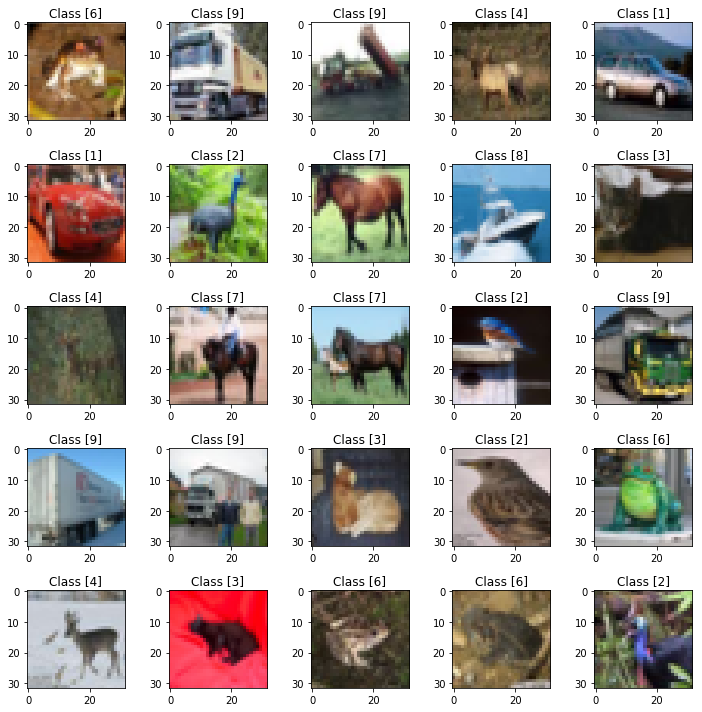

In [19]:
fig = plt.figure(figsize=(10,10))
for idx in range(25):
    plt.subplot(5,5,idx+1)
    plt.imshow(X_train[idx], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[idx]))
plt.tight_layout()

In [20]:
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

num_channels = 3
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, num_channels)
x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, num_channels)
input_shape = (img_rows, img_cols, num_channels)

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [21]:
if np.max(X_train) > 1: X_train = X_train/255
if np.max(X_test) > 1: X_test = X_test/255

In [22]:
X_train.max(), X_test.max()

(1.0, 1.0)

In [23]:
y_train.shape

(50000, 1)

In [24]:
if len(y_train.shape) == 2:
    y_train = y_train.reshape(-1)
    y_test = y_test.reshape(-1)

if len(y_train.shape) == 1:
    num_classes = len(set(y_train))
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

In [25]:
y_train.shape, y_test.shape, num_classes

((50000, 10), (10000, 10), 10)

In [28]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
model.fit(X_train, y_train,
         batch_size=256, epochs=2, verbose=2,
         validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/2
 - 37s - loss: 1.6933 - acc: 0.3833 - val_loss: 1.3963 - val_acc: 0.5077
Epoch 2/2
 - 37s - loss: 1.3251 - acc: 0.5279 - val_loss: 1.1680 - val_acc: 0.5921


In [34]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
__________

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
model.fit(X_train, y_train,
         batch_size=256, epochs=10, verbose=2,
         validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 69s - loss: 1.9211 - acc: 0.2665 - val_loss: 1.5776 - val_acc: 0.4195
Epoch 2/10
 - 69s - loss: 1.5267 - acc: 0.4384 - val_loss: 1.3736 - val_acc: 0.5077
Epoch 3/10
 - 68s - loss: 1.3495 - acc: 0.5111 - val_loss: 1.2285 - val_acc: 0.5655
Epoch 4/10
 - 68s - loss: 1.2403 - acc: 0.5558 - val_loss: 1.1692 - val_acc: 0.5775
Epoch 5/10
 - 68s - loss: 1.1727 - acc: 0.5824 - val_loss: 1.0902 - val_acc: 0.6166
Epoch 6/10
 - 69s - loss: 1.1125 - acc: 0.6053 - val_loss: 1.0339 - val_acc: 0.6409
Epoch 7/10
 - 68s - loss: 1.0607 - acc: 0.6232 - val_loss: 0.9613 - val_acc: 0.6632
Epoch 8/10
 - 66s - loss: 1.0229 - acc: 0.6381 - val_loss: 0.9814 - val_acc: 0.6600
Epoch 9/10
 - 74s - loss: 0.9819 - acc: 0.6528 - val_loss: 0.9071 - val_acc: 0.6842
Epoch 10/10
 - 70s - loss: 0.9540 - acc: 0.6657 - val_loss: 0.8911 - val_acc: 0.6941
